In [117]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# from subprocess import check_output
# print(check_output(['ls', 'C:/Users/wanyanwendi/Desktop/dataset/01房价多元回归预测']))


In [118]:
all_df = pd.read_csv('C:/Users/wanyanwendi/Desktop/dataset/01房价多元回归预测/data/housing.csv')

In [119]:
all_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


In [120]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [121]:
all_df.describe().T
#missing data ['total_bedrooms']

,count,mean,std,min,25%,50%,75%,max
longitude,20640.000,-119.570,2.004,-124.350,-121.800,-118.490,-118.010,-114.310
latitude,20640.000,35.632,2.136,32.540,33.930,34.260,37.710,41.950
housing_median_age,20640.000,28.639,12.586,1.000,18.000,29.000,37.000,52.000
total_rooms,20640.000,2635.763,2181.615,2.000,1447.750,2127.000,3148.000,39320.000
total_bedrooms,20433.000,537.871,421.385,1.000,296.000,435.000,647.000,6445.000
population,20640.000,1425.477,1132.462,3.000,787.000,1166.000,1725.000,35682.000
households,20640.000,499.540,382.330,1.000,280.000,409.000,605.000,6082.000
median_income,20640.000,3.871,1.900,0.500,2.563,3.535,4.743,15.000
median_house_value,20640.000,206855.817,115395.616,14999.000,119600.000,179700.000,264725.000,500001.000


In [122]:
all_df.shape

(20640, 10)

In [123]:
all_df.duplicated().sum()

0

In [124]:
all_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Data processing

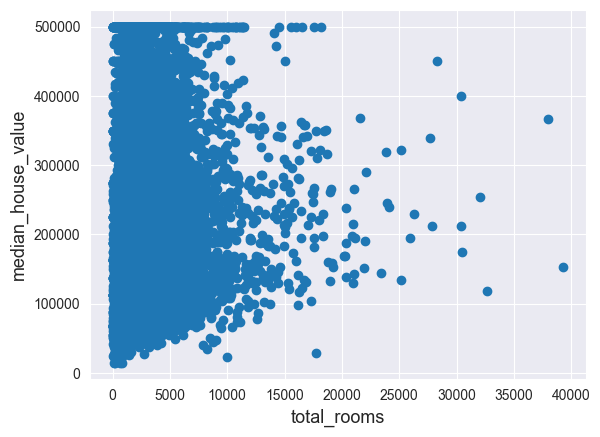

In [125]:
#Exploring these outliers
fig, ax = plt.subplots()
ax.scatter(x=all_df['total_rooms'], y=all_df['median_house_value'])
plt.ylabel('median_house_value', fontsize=13)
plt.xlabel('total_rooms', fontsize=13)
plt.show()

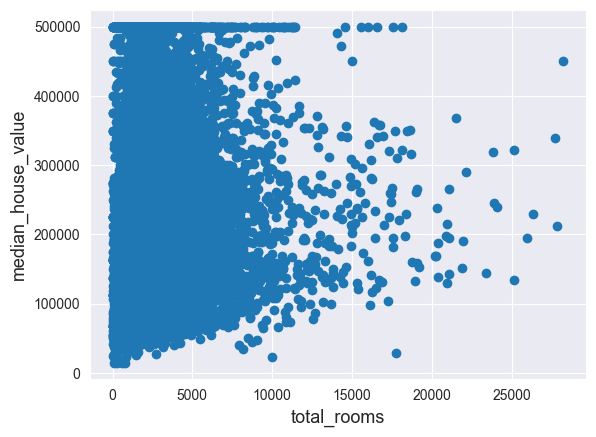

In [126]:
#deleting outliers
all_df = all_df.drop(all_df[(all_df['total_rooms']>30000)].index)
#check the graphic again
fig, ax = plt.subplots()
ax.scatter(x=all_df['total_rooms'], y=all_df['median_house_value'])
plt.ylabel('median_house_value', fontsize=13)
plt.xlabel('total_rooms', fontsize=13)
plt.show()

Target Variable


 mu = 206844.65 and sigma = 115396.37



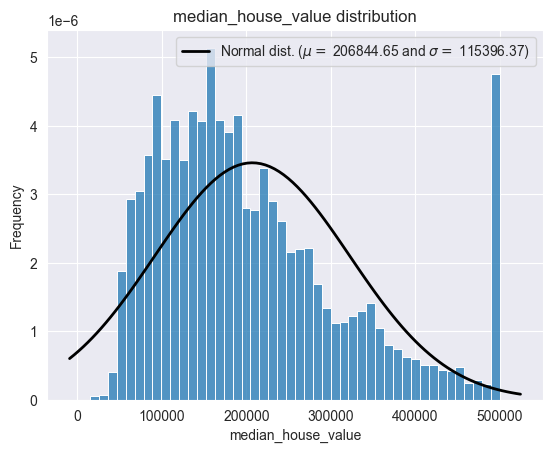

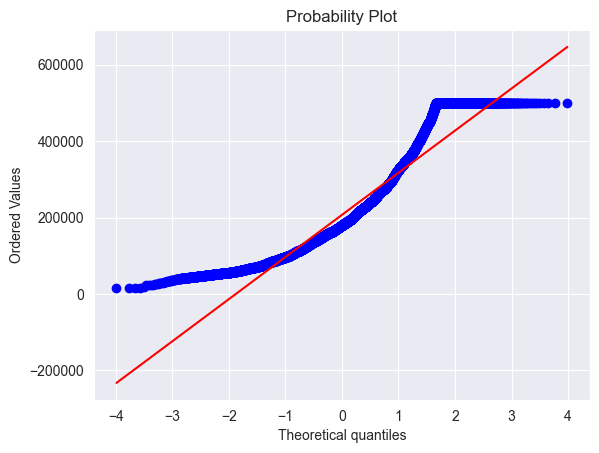

In [127]:
# Plot the histogram with density
sns.histplot(all_df['median_house_value'], stat='density', kde=False)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(all_df['median_house_value'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('median_house_value distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(all_df['median_house_value'], plot=plt)

plt.show()


Log-transformation of the target variable


 mu = 12.08 and sigma = 0.57



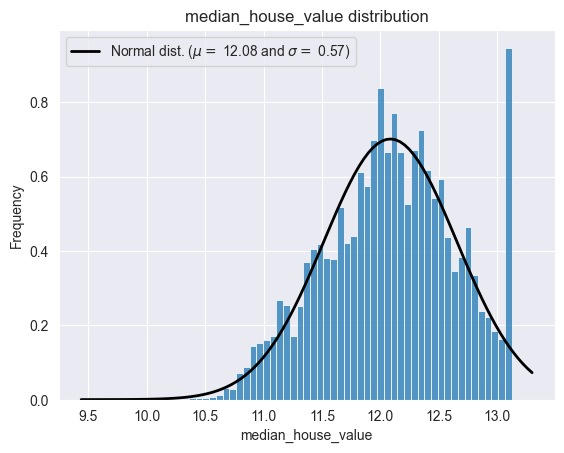

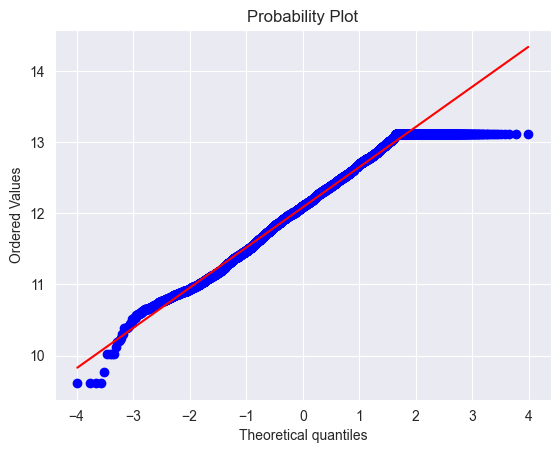

In [128]:
#we use the numpy fuction log1p which applies log(1+x) to all elements of the column
all_df['median_house_value'] = np.log1p(all_df['median_house_value'])

#Check the new distribution
sns.histplot(all_df['median_house_value'], stat='density', kde=False)

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(all_df['median_house_value'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Plot the fitted normal distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('median_house_value distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(all_df['median_house_value'], plot=plt)
plt.show()

In [129]:
y_train = all_df['median_house_value']
all_df.drop(['median_house_value'], axis=1, inplace=True)
all_df.shape

(20633, 9)

In [130]:
all_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,NEAR BAY


Missing Data

In [131]:
all_df_na = (all_df.isnull().sum()) / len(all_df) * 100
all_df_na = all_df_na.drop(all_df_na[all_df_na == 0].index).sort_values(ascending=False)[0:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_df_na})
missing_data.head(10)

,Missing Ratio
total_bedrooms,1.003


Data Correlation

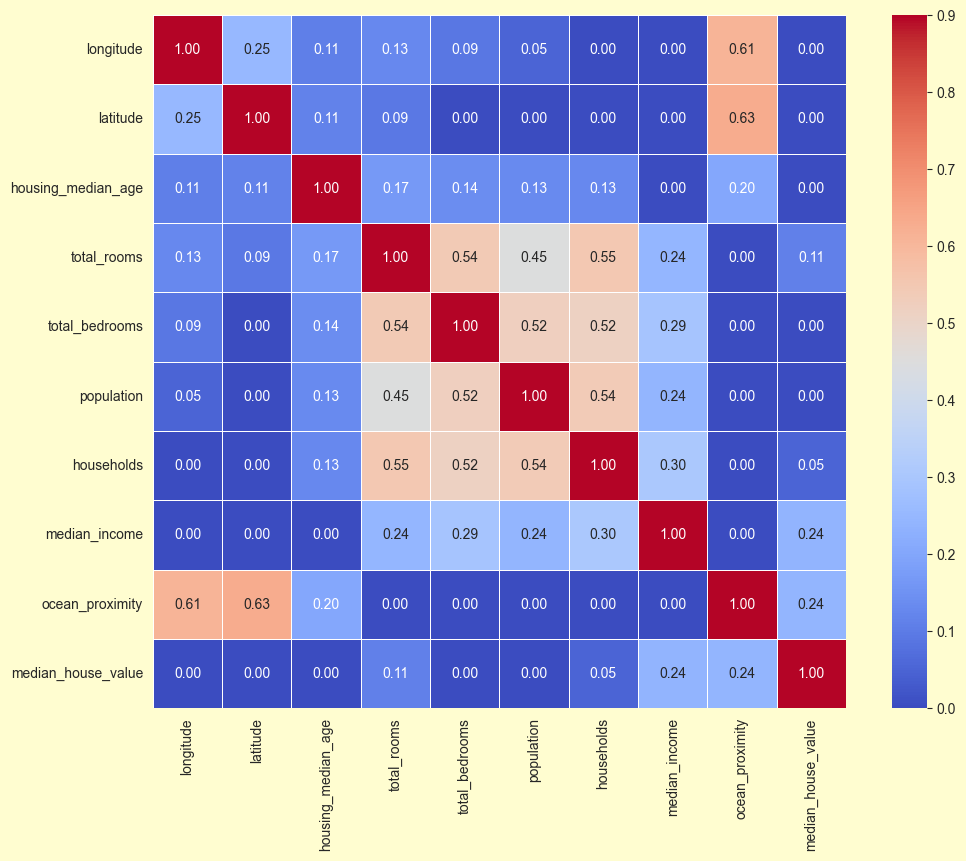

In [132]:
#Correlation map to see how features are correlated with median_house_value
from dython.nominal import associations
data = pd.concat([all_df, y_train], axis=1)
associations_df = associations(data, nominal_columns='all', plot=False)
corr_matric = associations_df['corr']
plt.figure(figsize=(12,9))
plt.gcf().set_facecolor('#FFFDD0')
sns.heatmap(corr_matric, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmax=0.9, square=True)
plt.show()

In [133]:
all_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

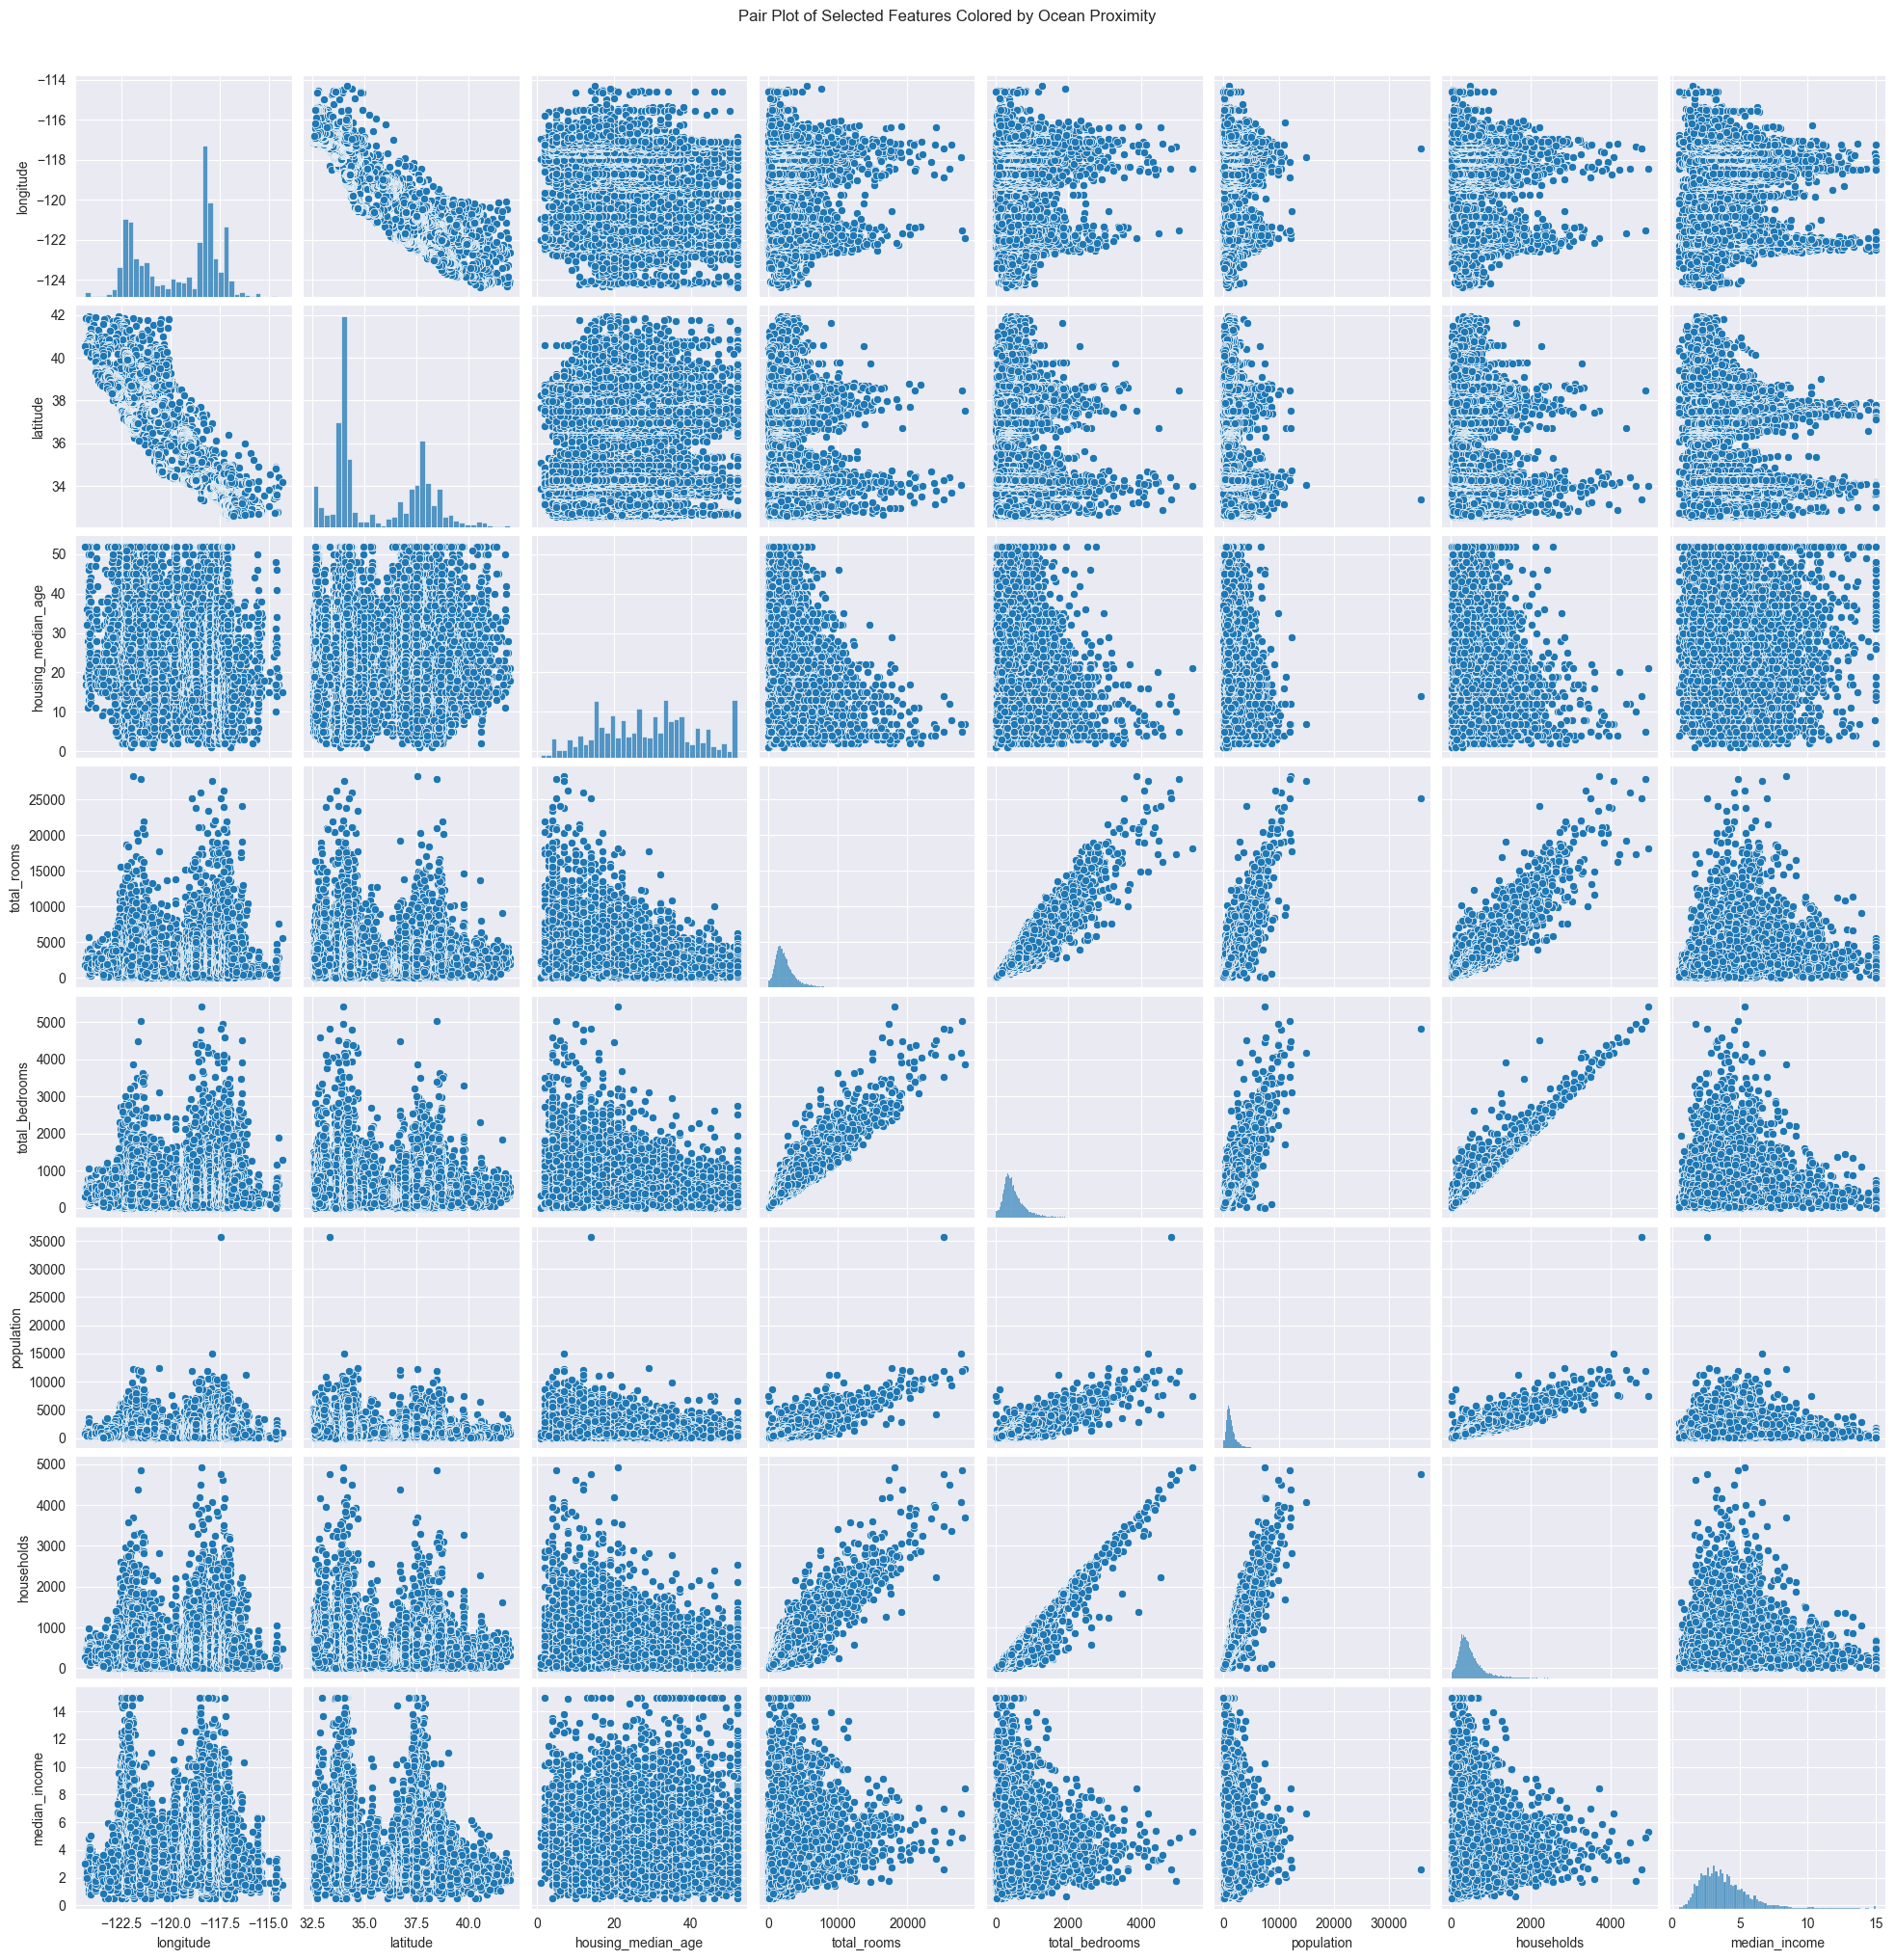

In [134]:
sns.pairplot(all_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']])
plt.suptitle('Pair Plot of Selected Features Colored by Ocean Proximity', y=1.02)
plt.show()

In [135]:
all_df.drop(['total_bedrooms', 'population', 'longitude', 'latitude', 'housing_median_age'], axis=1, inplace=True)
all_df.head()

,total_rooms,households,median_income,ocean_proximity
0,880.000,126.000,8.325,NEAR BAY
1,7099.000,1138.000,8.301,NEAR BAY
2,1467.000,177.000,7.257,NEAR BAY
3,1274.000,219.000,5.643,NEAR BAY
4,1627.000,259.000,3.846,NEAR BAY


Label Encoding some categorical variables that may contain information in their ordering set

In [136]:
from sklearn.preprocessing import LabelEncoder
cols = ['ocean_proximity']
for c in cols:
    le = LabelEncoder()
    le.fit(list(data[c].values))
    data[c] = le.transform(list(data[c].values)).astype(float)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,3.000,13.023
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,3.000,12.790
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,3.000,12.772
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,3.000,12.741
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,3.000,12.743


In [137]:
# Adding new feature 
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)
all_df['total_rooms_bedrooms'] = data['total_rooms'] + data['total_bedrooms']
all_df['multiple_households_tooms'] = data['households']*data['total_rooms']
all_df['multiple_population_rooms'] = data['population']*data['median_income']
# all_df['multiple_longitude_ocean_proximity'] = data['longitude']*data['ocean_proximity']
all_df['mutiple_latitude_ocean_proximity'] = data['latitude']*data['ocean_proximity']
all_df.head()


,total_rooms,households,median_income,ocean_proximity,total_rooms_bedrooms,multiple_households_tooms,multiple_population_rooms,mutiple_latitude_ocean_proximity
0,880.000,126.000,8.325,NEAR BAY,1009.000,110880.000,2680.714,113.640
1,7099.000,1138.000,8.301,NEAR BAY,8205.000,8078662.000,19931.661,113.580
2,1467.000,177.000,7.257,NEAR BAY,1657.000,259659.000,3599.670,113.550
3,1274.000,219.000,5.643,NEAR BAY,1509.000,279006.000,3148.850,113.550
4,1627.000,259.000,3.846,NEAR BAY,1907.000,421393.000,2173.103,113.550


In [138]:
all_df.columns

Index(['total_rooms', 'households', 'median_income', 'ocean_proximity',
       'total_rooms_bedrooms', 'multiple_households_tooms',
       'multiple_population_rooms', 'mutiple_latitude_ocean_proximity'],
      dtype='object')

Skewed features

In [139]:
numeric_feats = all_df.dtypes[all_df.dtypes != 'object' ].index
#Check the skew of all numerical features
skewed_feats = all_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
multiple_households_tooms,10.327
multiple_population_rooms,4.241
total_rooms,3.533
total_rooms_bedrooms,3.463
households,3.098
median_income,1.648
mutiple_latitude_ocean_proximity,0.970


In [140]:
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed numerical features to Box Cox transform'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam=0.15
for feat in skewed_features:
    all_df[feat] = boxcox1p(all_df[feat], lam)


There are 7 skewed numerical features to Box Cox transform


In [141]:
all_df.head()

,total_rooms,households,median_income,ocean_proximity,total_rooms_bedrooms,multiple_households_tooms,multiple_population_rooms,mutiple_latitude_ocean_proximity
0,11.769,7.121,2.652,NEAR BAY,12.151,31.408,15.119,6.911
1,18.545,12.493,2.649,NEAR BAY,19.098,65.779,22.767,6.909
2,13.236,7.837,2.484,NEAR BAY,13.603,36.592,16.104,6.909
3,12.820,8.305,2.190,NEAR BAY,13.321,37.060,15.651,6.909
4,13.548,8.685,1.781,NEAR BAY,14.035,39.850,14.444,6.909


In [142]:
all_df = pd.get_dummies(all_df)
all_df.shape

(20633, 12)

In [143]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20633 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   total_rooms                       20633 non-null  float64
 1   households                        20633 non-null  float64
 2   median_income                     20633 non-null  float64
 3   total_rooms_bedrooms              20633 non-null  float64
 4   multiple_households_tooms         20633 non-null  float64
 5   multiple_population_rooms         20633 non-null  float64
 6   mutiple_latitude_ocean_proximity  20633 non-null  float64
 7   ocean_proximity_<1H OCEAN         20633 non-null  bool   
 8   ocean_proximity_INLAND            20633 non-null  bool   
 9   ocean_proximity_ISLAND            20633 non-null  bool   
 10  ocean_proximity_NEAR BAY          20633 non-null  bool   
 11  ocean_proximity_NEAR OCEAN        20633 non-null  bool   
dtypes: bool(5

In [144]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(all_df, y_train,test_size = 0.2, random_state =42)

In [145]:
# # Logistic Regression
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# lr.fit(train_X, train_y)
# y_pred = lr.predict(test_X)
# acc_log = round(lr.score(train_X, train_y) * 100, 2)
# test_log = round(lr.score(test_X, test_y) * 100, 2)

# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(test_y, y_pred)

# print('Acc_log: {:.2f}\nTest Accuracy: {:.2f}'.format(acc_log, test_log))
# print(f"Mean Squared Error:: {mse}")

In [146]:
# import optuna
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # 定义目标函数
# def objective_lgbm(trial):
#     # 将数据集分成训练集和验证集
#     X_train, X_valid, y_train, y_valid = train_test_split(
#         train_X, train_y, test_size=0.2, random_state=42
#     )

#     # 定义需要优化的超参数
#     param = {
#         'objective': 'regression',
#         'metric': 'rmse',
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 300),
#         'max_depth': trial.suggest_int('max_depth', -1, 20),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#         'random_state': 42,
#     }

#     # 初始化并训练模型
#     model = lgb.LGBMRegressor(**param)

#     # 训练模型并使用早停和控制日志输出
#     model.fit(
#         X_train,
#         y_train,
#         eval_set=[(X_valid, y_valid)],
#         eval_metric='rmse',
#         callbacks=[lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(period=10)]  # 控制每10轮输出一次
#     )

#     # 预测验证集
#     preds = model.predict(X_valid)

#     # 计算均方误差
#     mse = mean_squared_error(y_valid, preds)
#     return mse

# # 使用 Optuna 创建一个研究对象
# study_lgbm = optuna.create_study(direction='minimize')
# study_lgbm.optimize(objective_lgbm, n_trials=50)

# # 输出最优参数
# print("Best parameters for LightGBM: ", study_lgbm.best_params)



In [147]:
# import optuna
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # 定义目标函数
# def objective_catboost(trial):
#     # 定义需要优化的超参数
#     param = {
#         'iterations': trial.suggest_int('iterations', 100, 1000),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'depth': trial.suggest_int('depth', 4, 10),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10),
#         'border_count': trial.suggest_int('border_count', 32, 255),
#         'random_strength': trial.suggest_float('random_strength', 1e-9, 10),
#         'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
#         'od_type': 'Iter',
#         'od_wait': trial.suggest_int('od_wait', 10, 50)
#     }

#     # 将数据集分成训练集和验证集
#     X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

#     # 初始化并训练模型
#     model = CatBoostRegressor(**param, verbose=0)
#     model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100)

#     # 预测验证集
#     preds = model.predict(X_valid)
    
#     # 计算均方误差
#     mse = mean_squared_error(y_valid, preds)
#     return mse

# # 使用 Optuna 创建一个研究对象
# study_catboost = optuna.create_study(direction='minimize')
# study_catboost.optimize(objective_catboost, n_trials=50)

# # 输出最优参数
# print("Best parameters for CatBoost: ", study_catboost.best_params)


In [148]:
# Import necessary libraries
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

param_l =  {'n_estimators': 290, 
            'learning_rate': 0.048461725172259114, 
            'num_leaves': 98, 
            'max_depth': 17, 
            'min_child_samples': 56,
              'subsample': 0.6044239167291161, 
              'colsample_bytree': 0.9647809026525098,
                'reg_alpha': 0.9567452526413425,
                  'reg_lambda': 0.9902051678230401}
param_c =  {'iterations': 453,
             'learning_rate': 0.17125902038196997,
               'depth': 7, 'l2_leaf_reg': 4.743391213189782,
                 'border_count': 208, 'random_strength': 6.697243726937994,
                  'bagging_temperature': 0.03314505707604898,
                    'od_wait': 15}
# Initialize LightGBM and CatBoost models
lgbm_model = LGBMRegressor(**param_l)
catboost_model = CatBoostRegressor(**param_c)

# Train both models
lgbm_model.fit(train_X, train_y)
catboost_model.fit(train_X, train_y)

# Make predictions using both models
y_pred_lgbm = lgbm_model.predict(test_X)
y_pred_catboost = catboost_model.predict(test_X)

# Define the weights for the models
weight_lgbm = 0.5
weight_catboost = 0.5

# Weighted average of predictions
y_pred_weighted = weight_lgbm * y_pred_lgbm + weight_catboost * y_pred_catboost

# Calculate accuracies
acc_lgbm = round(lgbm_model.score(train_X, train_y) * 100, 2)
acc_catboost = round(catboost_model.score(train_X, train_y) * 100, 2)

test_lgbm = round(lgbm_model.score(test_X, test_y) * 100, 2)
test_catboost = round(catboost_model.score(test_X, test_y) * 100, 2)

# Mean squared error for the weighted predictions
mse_weighted = mean_squared_error(test_y, y_pred_weighted)

# Print results
print('LGBM Train Accuracy: {:.2f}'.format(acc_lgbm))
print('CatBoost Train Accuracy: {:.2f}'.format(acc_catboost))
print('LGBM Test Accuracy: {:.2f}'.format(test_lgbm))
print('CatBoost Test Accuracy: {:.2f}'.format(test_catboost))

print(f"Weighted Mean Squared Error: {mse_weighted}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1793
[LightGBM] [Info] Number of data points in the train set: 16506, number of used features: 11
[LightGBM] [Info] Start training from score 12.085636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [149]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# train_sizes, train_scores, test_scores = learning_curve(lr, train_X, train_y, cv=5)

# plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
# plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
# plt.xlabel('Training Size')
# plt.ylabel('Score')
# plt.legend()
# plt.show()

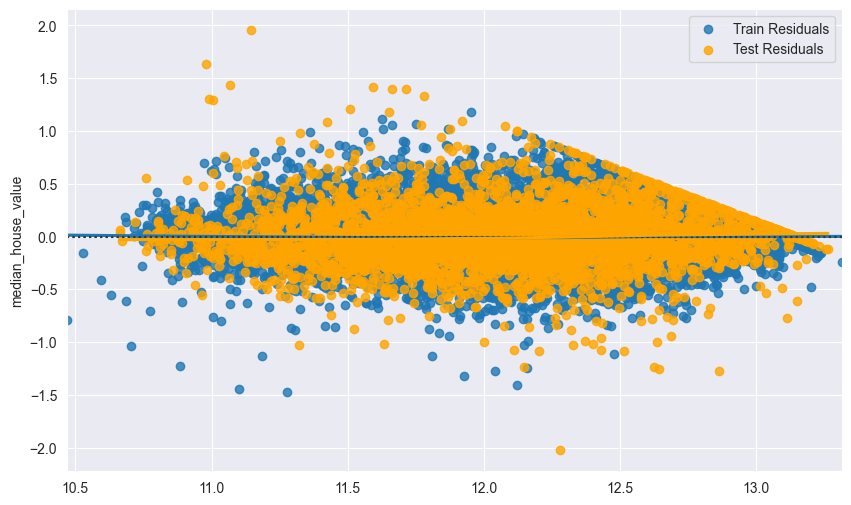

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# 获取预测值
y_train_pred = catboost_model.predict(train_X)
y_test_pred = catboost_model.predict(test_X)

# 生成残差图
plt.figure(figsize=(10, 6))

# 绘制训练集残差图
sns.residplot(x=y_train_pred, y=train_y, label='Train Residuals', lowess=True)

# 绘制测试集残差图
sns.residplot(x=y_test_pred, y=test_y, label='Test Residuals', color='orange', lowess=True)

# 添加图例和显示图像
plt.legend()
plt.show()


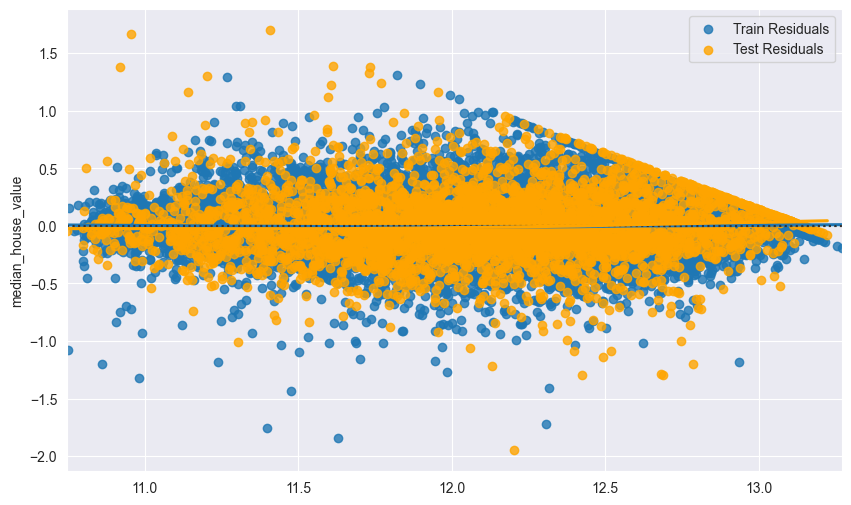

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# 获取预测值
y_train_pred = lgbm_model.predict(train_X)
y_test_pred = lgbm_model.predict(test_X)

# 生成残差图
plt.figure(figsize=(10, 6))

# 绘制训练集残差图
sns.residplot(x=y_train_pred, y=train_y, label='Train Residuals', lowess=True)

# 绘制测试集残差图
sns.residplot(x=y_test_pred, y=test_y, label='Test Residuals', color='orange', lowess=True)

# 添加图例和显示图像
plt.legend()
plt.show()